In [11]:
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [104]:
def csv2X(fname):
   mypd = pd.read_csv(fname, sep=',')
   X = np.transpose(mypd.values)
   return X

X = csv2X("/Users/driscoll/Dropbox/research/hackathon19/datasets/PCA_projections_80_variance.csv")
X.shape
status = np.loadtxt("/Users/driscoll/Dropbox/research/hackathon19/datasets/PCA_status.txt")

In [107]:
X = X[1:,:]  # remove patient 0, who is a known outlier

First we compute an $n\times n$ similarity matrix for the population. This is the slowest step. This is using similarity based on 100 nearest neighbors.

In [46]:
sc = SpectralClustering(affinity='nearest_neighbors',n_neighbors=100,n_clusters=2).fit(X);
W = sc.affinity_matrix_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Now we use the similarity to compute spectral embeddings for varying numbers $k$ of clusters. For each $k$ we show the average silhouette score (-1=worst, +1=best), the counts in each cluster found, and a silhouette plot to show clustering quality.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


S score with 2 clusters is 0.5173006425345967
[1167  182]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


S score with 3 clusters is 0.11511399239229339
[182 791 376]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


S score with 4 clusters is 0.09891883725716426
[375 182 363 429]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


S score with 5 clusters is 0.10153090679391336
[182  60 411 344 352]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


S score with 6 clusters is 0.09671865775403225
[189 182 158 350 411  59]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


S score with 7 clusters is 0.09814760497683299
[296 182 350 193 153  59 116]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


S score with 8 clusters is 0.06687607977715926
[153  98 307 350 193  59  84 105]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


S score with 9 clusters is 0.06500351764495585
[350  88 193  91 153 112  59  94 209]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


S score with 10 clusters is 0.06549683377546436
[ 82 111 350  48  91 210  52 193 153  59]


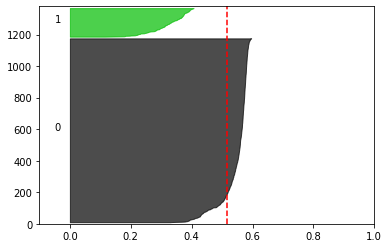

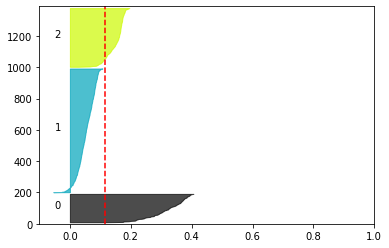

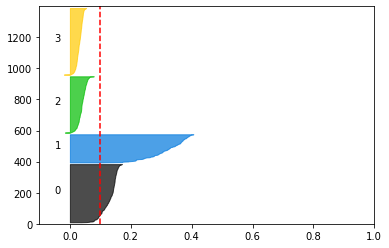

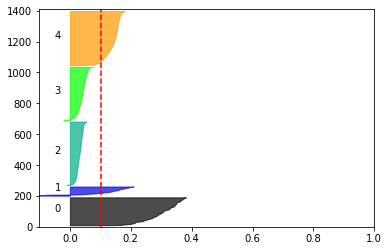

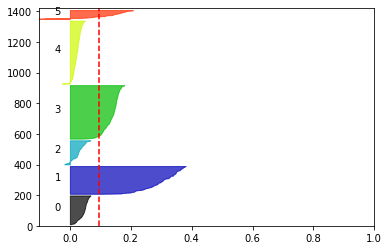

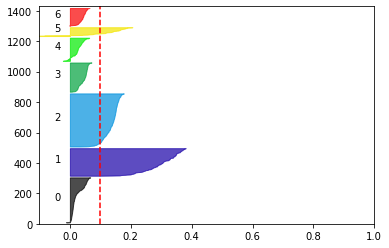

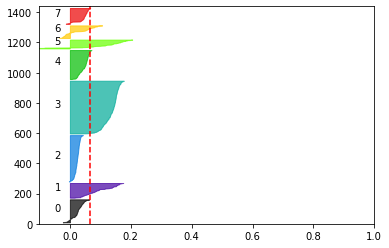

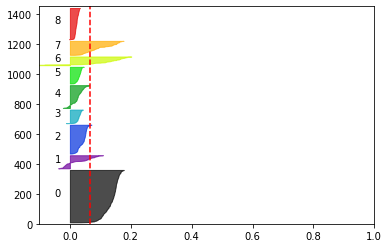

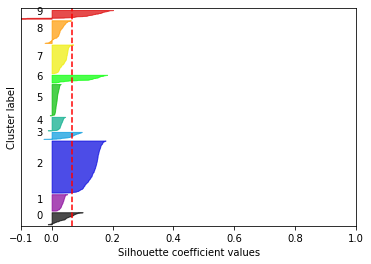

In [59]:
n_clusters = range(2,11)

for N in n_clusters:
    fig,ax = plt.subplots(1,1)
    y_lower = 10    

    clust = SpectralClustering(affinity='precomputed',n_clusters=N,assign_labels="discretize")
    labels = clust.fit_predict(W)
    sil_values = silhouette_samples(X,labels)
    
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (N + 1) * 10])

    for i in range(N):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        vi = sil_values[labels == i]
        vi.sort()
    
        Ni = vi.shape[0]
        y_upper = y_lower + Ni

        color = cm.nipy_spectral(float(i) / N)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, vi,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * Ni, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    # The vertical line for average silhouette score of all the values       
    silhouette_avg = silhouette_score(X,labels)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    print('S score with {} clusters is {}'.format(N,silhouette_avg))
    print(np.histogram(labels,range(N+1))[0])

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]);
plt.show()


We repeat for an RBF similarity matrix.

S score with 2 clusters is 0.5173006425345967
[ 182 1167]
S score with 3 clusters is 0.4714111668117608
[1167  140   42]
S score with 4 clusters is 0.4606142468929343
[1167   48   97   37]
S score with 5 clusters is 0.08315712045240976
[789 378  48  37  97]
S score with 6 clusters is 0.08171552025011951
[789 378  21  29  95  37]
S score with 7 clusters is 0.08535105203334377
[355 760  52  21  29  95  37]
S score with 8 clusters is 0.08431472545037567
[760 355   8  52  40  36  66  32]
S score with 9 clusters is 0.08399160678296184
[760  52   8  18  22  32  35  67 355]
S score with 10 clusters is 0.08431471345119068
[760 355  11  52   8  18  32  35  67  11]


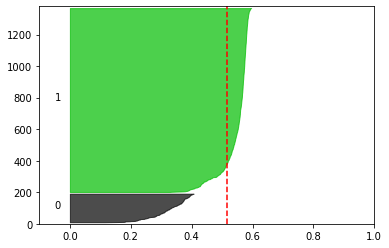

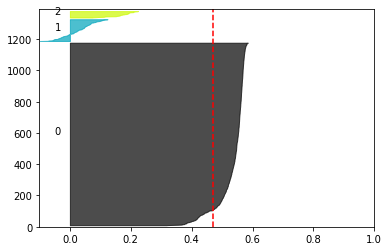

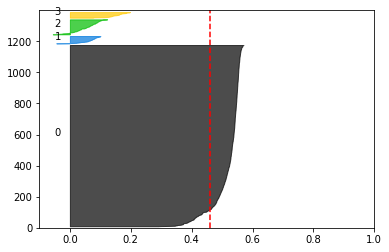

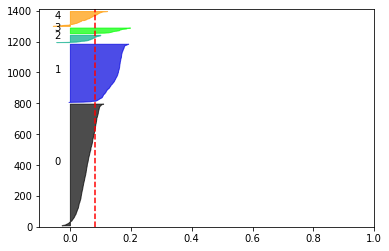

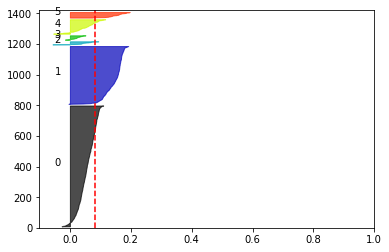

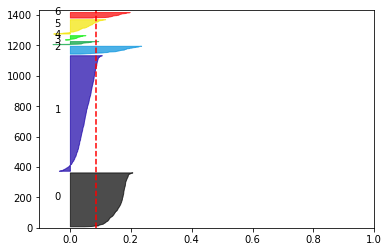

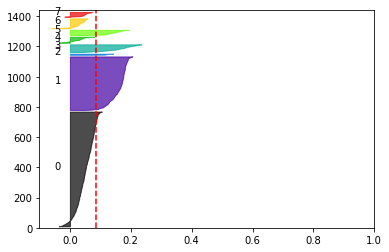

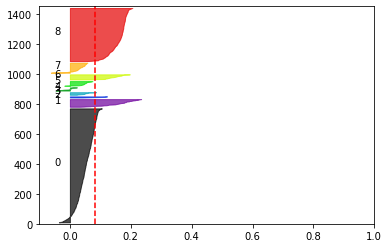

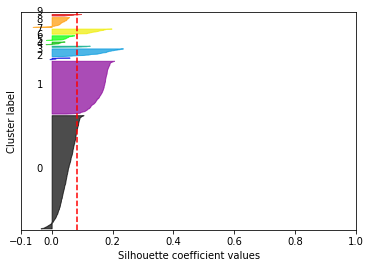

In [103]:
sc = SpectralClustering(affinity='rbf',gamma=0.0001,n_clusters=2).fit(X);
W = sc.affinity_matrix_
n_clusters = range(2,11)

for N in n_clusters:
    fig,ax = plt.subplots(1,1)
    y_lower = 10    

    clust = SpectralClustering(affinity='precomputed',n_clusters=N,assign_labels="discretize")
    labels = clust.fit_predict(W)
    sil_values = silhouette_samples(X,labels)
    
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (N + 1) * 10])

    for i in range(N):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        vi = sil_values[labels == i]
        vi.sort()
    
        Ni = vi.shape[0]
        y_upper = y_lower + Ni

        color = cm.nipy_spectral(float(i) / N)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, vi,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * Ni, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    # The vertical line for average silhouette score of all the values       
    silhouette_avg = silhouette_score(X,labels)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    print('S score with {} clusters is {}'.format(N,silhouette_avg))
    print(np.histogram(labels,range(N+1))[0])

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]);
plt.show()

Here we use k means for varying $k$, with the same quality measures.

S score with 2 clusters is 0.5173006425345967
S score with 3 clusters is 0.11517384484620627
S score with 4 clusters is 0.11701028140767585
S score with 5 clusters is 0.08466716792401778
S score with 6 clusters is 0.076327384939503
S score with 7 clusters is 0.058833516886264106
S score with 8 clusters is 0.06910435280729675
S score with 9 clusters is 0.05717279160030415
S score with 10 clusters is 0.06394719985982933


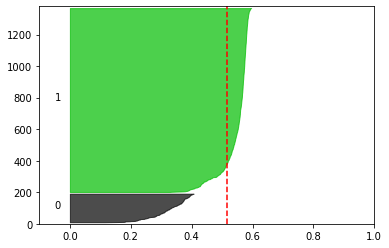

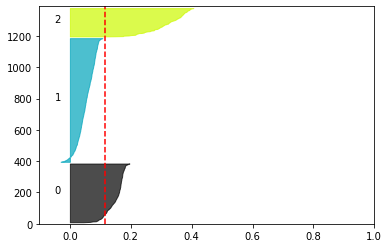

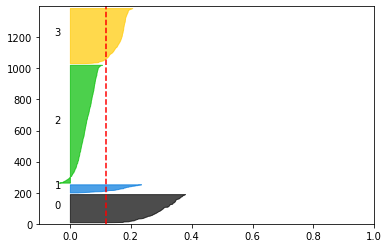

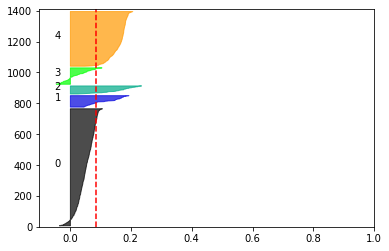

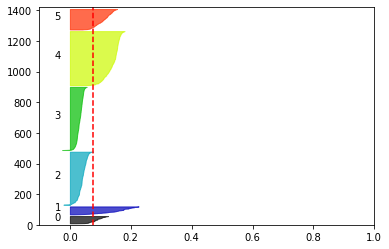

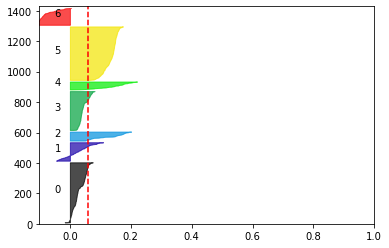

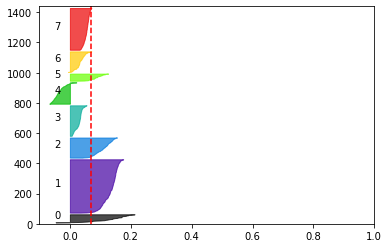

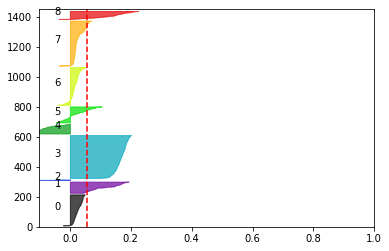

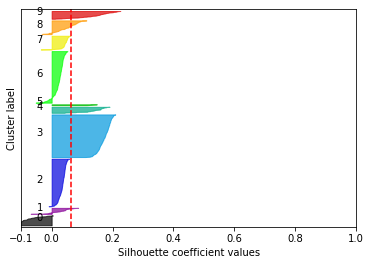

In [48]:
n_clusters = range(2,8)

for N in n_clusters:
    fig,ax = plt.subplots(1,1)
    y_lower = 10    

    km = KMeans(
        n_clusters=N, init='random',
        n_init=10, max_iter=300, 
        tol=1e-4
        )
    labels = km.fit_predict(X)

    sil_values = silhouette_samples(X,labels)
    
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (N + 1) * 10])

    for i in range(N):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        vi = sil_values[labels == i]
        vi.sort()
    
        Ni = vi.shape[0]
        y_upper = y_lower + Ni

        color = cm.nipy_spectral(float(i) / N)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, vi,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * Ni, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    # The vertical line for average silhouette score of all the values       
    silhouette_avg = silhouette_score(X,labels)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    print('S score with {} clusters is {}'.format(N,silhouette_avg))
    print(np.histogram(labels,range(N+1))[0])

ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]);
plt.show()


In [102]:
sc = SpectralClustering(affinity='rbf',gamma=0.0002,n_clusters=2).fit(X);
W = sc.affinity_matrix_
W

array([[1.00000000e+00, 5.93978849e-05, 9.41183039e-03, ...,
        1.97200433e-06, 9.10509190e-06, 1.05237038e-04],
       [5.93978849e-05, 1.00000000e+00, 2.89713095e-05, ...,
        2.02695339e-08, 7.23388979e-06, 1.56282341e-06],
       [9.41183039e-03, 2.89713095e-05, 1.00000000e+00, ...,
        6.90527399e-06, 7.59899657e-06, 1.04120172e-04],
       ...,
       [1.97200433e-06, 2.02695339e-08, 6.90527399e-06, ...,
        1.00000000e+00, 1.00252215e-07, 6.03832797e-06],
       [9.10509190e-06, 7.23388979e-06, 7.59899657e-06, ...,
        1.00252215e-07, 1.00000000e+00, 3.44259603e-06],
       [1.05237038e-04, 1.56282341e-06, 1.04120172e-04, ...,
        6.03832797e-06, 3.44259603e-06, 1.00000000e+00]])

In [90]:
sum((X[1,:]-X[10,:])^2) 

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [99]:
sum((X[1000,:]-X[100,:])**2)

39942.93954589635

In [97]:
np.sqrt(49800)

223.15913604421397

In [101]:
np.exp(-40000*.0001)

0.01831563888873418

In [106]:
X.shape

(1350, 17693)

In [108]:
sum(status)

773.0

In [118]:
N = 4
clust = SpectralClustering(affinity='precomputed',n_clusters=N,assign_labels="discretize")
labels = clust.fit_predict(W)

for i in range(N):
    print(sum((labels==i) * (status==1)))


674
25
43
31


In [117]:
sum(labels==0)

1167

In [119]:
X.shape

(1349, 17693)